In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [36]:
heart = pd.read_csv('heart.csv')

In [37]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [38]:
heart.shape

(918, 12)

In [39]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [40]:
heart['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

Lets visually explore the dataset

In [41]:
healthy = heart[heart['HeartDisease'] == 0]

In [42]:
print(heart['ChestPainType'].value_counts(), heart['RestingECG'].value_counts(), heart['ExerciseAngina'].value_counts(), heart['ST_Slope'].value_counts())

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64 RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64 ExerciseAngina
N    547
Y    371
Name: count, dtype: int64 ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


In [43]:
unhealthy= heart[heart['HeartDisease'] == 1]

In [44]:
unhealthy.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.0
mean,55.899606,134.185039,175.940945,0.334646,127.655512,1.274213,1.0
std,8.727056,19.828685,126.391398,0.472332,23.386923,1.151872,0.0
min,31.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,1.0
25%,51.000000,120.000000,0.000000,0.000000,112.000000,0.000000,1.0
50%,57.000000,132.000000,217.000000,0.000000,126.000000,1.200000,1.0
75%,62.000000,145.000000,267.000000,1.000000,144.250000,2.000000,1.0
max,77.000000,200.000000,603.000000,1.000000,195.000000,6.200000,1.0


<Axes: xlabel='Age', ylabel='Count'>

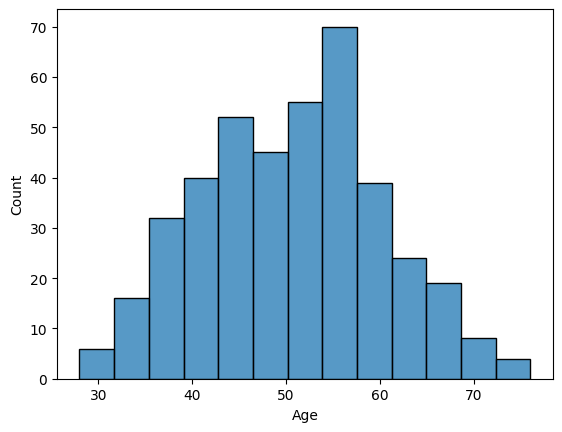

In [45]:
sns.histplot(healthy.Age)

<Axes: xlabel='Age', ylabel='Count'>

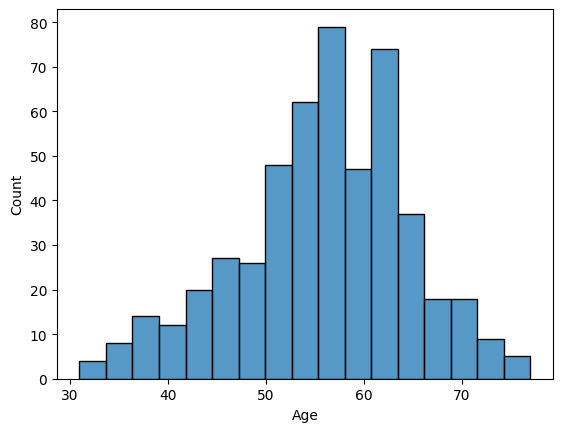

In [46]:
sns.histplot(unhealthy.Age)

There is no ususual distribution of both healthy and unhealthy age groups 

In [47]:
data= pd.read_csv('heart.csv')

# separating numerical and categorical data
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

# label encoding process
data_encoded = data.copy()
for col in categorical_cols:
    data_encoded[col] = LabelEncoder().fit_transform(data_encoded[col])

# Separate features and target
X = data_encoded.drop('HeartDisease', axis=1)
y = data_encoded['HeartDisease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

model_results = {}

for model_name, model in models.items():
    pipeline = Pipeline(steps=[
        ('scaler', StandardScaler()),  # Scale numerical features
        ('classifier', model)          # Use the classifier
    ])
    
    
    pipeline.fit(X_train, y_train)  
    y_pred = pipeline.predict(X_test)    
    model_results[model_name] = classification_report(y_test, y_pred, output_dict=True)

model_results


{'Logistic Regression': {'0': {'precision': 0.8421052631578947,
   'recall': 0.7529411764705882,
   'f1-score': 0.7950310559006211,
   'support': 85},
  '1': {'precision': 0.8055555555555556,
   'recall': 0.8787878787878788,
   'f1-score': 0.8405797101449276,
   'support': 99},
  'accuracy': 0.8206521739130435,
  'macro avg': {'precision': 0.8238304093567251,
   'recall': 0.8158645276292336,
   'f1-score': 0.8178053830227743,
   'support': 184},
  'weighted avg': {'precision': 0.8224399313501144,
   'recall': 0.8206521739130435,
   'f1-score': 0.8195382122603294,
   'support': 184}},
 'Random Forest': {'0': {'precision': 0.8648648648648649,
   'recall': 0.7529411764705882,
   'f1-score': 0.8050314465408804,
   'support': 85},
  '1': {'precision': 0.8090909090909091,
   'recall': 0.898989898989899,
   'f1-score': 0.8516746411483254,
   'support': 99},
  'accuracy': 0.8315217391304348,
  'macro avg': {'precision': 0.836977886977887,
   'recall': 0.8259655377302436,
   'f1-score': 0.82835